In [19]:
cd /content/drive/MyDrive/Team31 Shared Task

/content/drive/MyDrive/Team31 Shared Task


In [19]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.2 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 54.9 MB/s 
     |████████████████████████████████| 439 kB 96.9 MB/s 
     |████████████████████████████████| 6.0 MB 69.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.1

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text
from sklearn.metrics import f1_score
from tensorflow.keras.utils import plot_model
import os

In [128]:
args_train = pd.read_csv("arguments-training.tsv", delimiter='\t')
labels_train = pd.read_csv("labels-training.tsv", delimiter='\t')
args_train.head()

,Argument ID,Conclusion,Stance,Premise
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...


In [131]:
args_train['Input'] = None
for i in range(len(args_train)):
    args_train.loc[i, 'Input'] = args_train.loc[i, 'Conclusion'].lower() + '<SEP>' + args_train.loc[i, 'Premise'].lower() + '<SEP>' + args_train.loc[i, 'Stance']

In [132]:
args_train.head()

,Argument ID,Conclusion,Stance,Premise,Input
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,we should ban human cloning<SEP>we should ban ...
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,we should ban fast food<SEP>fast food should b...
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,we should end the use of economic sanctions<SE...
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,we should abolish capital punishment<SEP>capit...
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,we should ban factory farming<SEP>factory farm...


In [133]:
labels_train.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,A01006,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [134]:
args_test = pd.read_csv("arguments-validation.tsv", delimiter='\t')
labels_test = pd.read_csv("labels-validation.tsv", delimiter='\t')

In [136]:
args_test['Input'] = None
for i in range(len(args_test)):
    args_test.loc[i, 'Input'] = args_test.loc[i, 'Conclusion'].lower() + '<SEP>' + args_test.loc[i, 'Premise'].lower() + '<SEP>' + args_test.loc[i, 'Stance']

In [137]:
args_test.head()

,Argument ID,Conclusion,Stance,Premise,Input
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,entrapment should be legalized<SEP>if entrapme...
1,A01012,The use of public defenders should be mandatory,in favor of,the use of public defenders should be mandator...,the use of public defenders should be mandator...
2,A02001,Payday loans should be banned,in favor of,payday loans create a more impoverished societ...,payday loans should be banned<SEP>payday loans...
3,A02002,Surrogacy should be banned,against,Surrogacy should not be banned as it is the wo...,surrogacy should be banned<SEP>surrogacy shoul...
4,A02009,Entrapment should be legalized,against,entrapment is gravely immoral and against huma...,entrapment should be legalized<SEP>entrapment ...


In [138]:
labels_test.head()

,Argument ID,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,A02001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,A02002,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A02009,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [139]:
labels_test.shape

(1896, 21)

In [140]:
labels_train.shape

(5393, 21)

In [141]:
df_train = args_train.merge(labels_train, how='inner', on='Argument ID')
df_train.head()

,Argument ID,Conclusion,Stance,Premise,Input,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01002,We should ban human cloning,in favor of,we should ban human cloning as it will only ca...,we should ban human cloning<SEP>we should ban ...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01005,We should ban fast food,in favor of,fast food should be banned because it is reall...,we should ban fast food<SEP>fast food should b...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A01006,We should end the use of economic sanctions,against,sometimes economic sanctions are the only thin...,we should end the use of economic sanctions<SE...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A01007,We should abolish capital punishment,against,capital punishment is sometimes the only optio...,we should abolish capital punishment<SEP>capit...,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,A01008,We should ban factory farming,against,factory farming allows for the production of c...,we should ban factory farming<SEP>factory farm...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [142]:
train_X = df_train[['Input']]
train_Y = df_train.drop(['Argument ID', 'Conclusion', 'Premise', 'Stance', 'Input'], axis=1)

In [143]:
df_test = args_test.merge(labels_test, how='inner', on='Argument ID')
df_test.head()

,Argument ID,Conclusion,Stance,Premise,Input,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,...,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,A01001,Entrapment should be legalized,in favor of,if entrapment can serve to more easily capture...,entrapment should be legalized<SEP>if entrapme...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A01012,The use of public defenders should be mandatory,in favor of,the use of public defenders should be mandator...,the use of public defenders should be mandator...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,A02001,Payday loans should be banned,in favor of,payday loans create a more impoverished societ...,payday loans should be banned<SEP>payday loans...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,A02002,Surrogacy should be banned,against,Surrogacy should not be banned as it is the wo...,surrogacy should be banned<SEP>surrogacy shoul...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A02009,Entrapment should be legalized,against,entrapment is gravely immoral and against huma...,entrapment should be legalized<SEP>entrapment ...,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1


In [144]:
test_X = df_test[['Input']]
test_Y = df_test.drop(['Argument ID', 'Conclusion', 'Premise', 'Stance', 'Input'], axis=1)

In [179]:
test_X.shape

(1896, 1)

In [145]:
X_train, X_val, y_train, y_val = train_test_split(train_X, train_Y, test_size=0.2, random_state=7)

In [178]:
X_train.shape, X_val.shape

((4314, 1), (1079, 1))

In [146]:
bert_preprocess_premise = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder_premise = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

In [147]:
premise_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
premise_preprocessed = bert_preprocess_premise(premise_input)
premise_output = bert_encoder_premise(premise_preprocessed)['pooled_output']
dense1 = tf.keras.layers.Dense(256, activation='relu')(premise_output)
dropout1 = tf.keras.layers.Dropout(0.1)(dense1)

output_layers = []
for i in range(20):
    dense5 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(dense5)
    output_layers.append(output)

model = tf.keras.Model(inputs=premise_input, outputs=output_layers)
from keras.metrics import Precision, Recall
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-2), metrics=['accuracy', Recall(), Precision()])

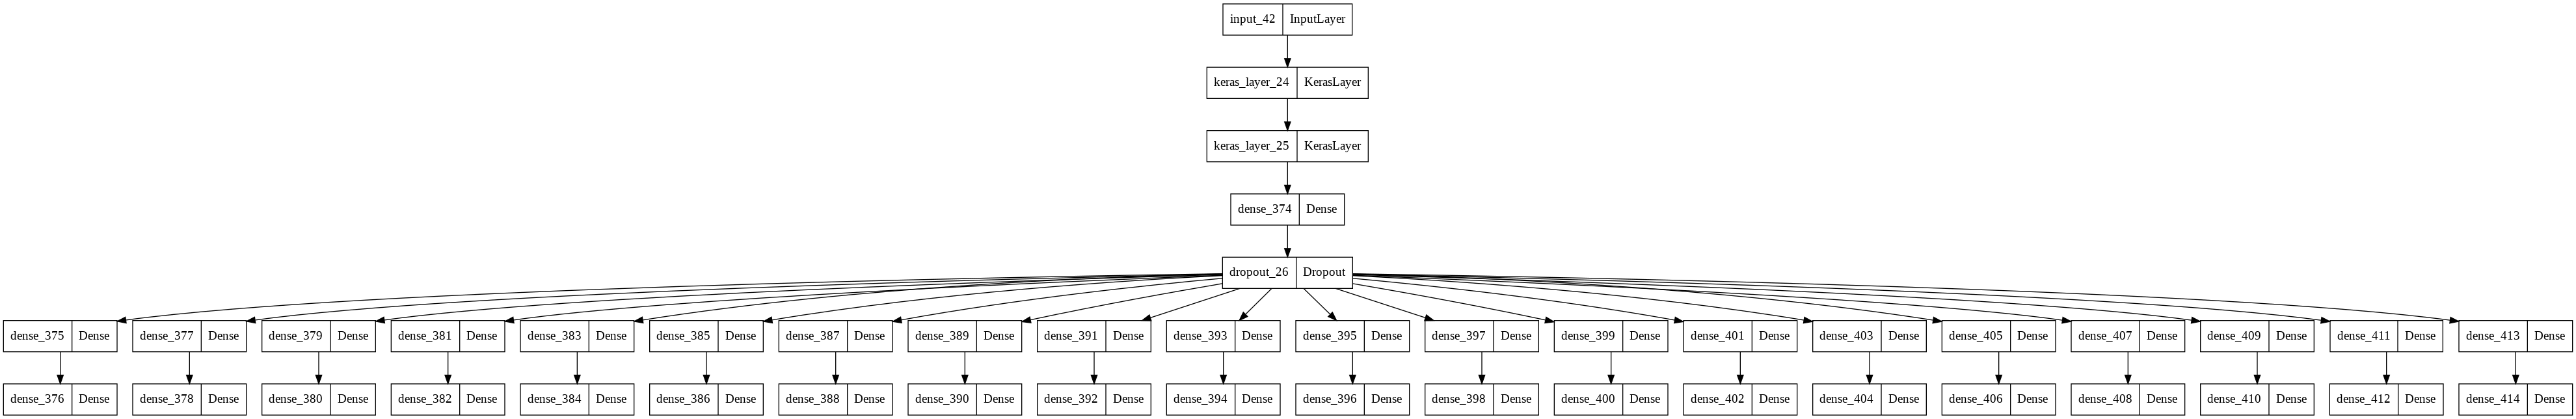

In [148]:
plot_model(model)

In [149]:
X_train.head()

,Input
1688,we should ban missionary work<SEP>we need thes...
414,we should legalize prostitution<SEP>legalising...
4461,we should abolish capital punishment<SEP>capit...
4542,we should ban cosmetic surgery for minors<SEP>...
4766,we should ban alcohol in india<SEP>crimes and ...


In [150]:
train_premise = X_train['Input'].values
train_output = []
for i in range(20):
    train_output.append(y_train.values[:, i])



val_premise = X_val['Input'].values
val_output = []
for i in range(20):
    val_output.append(y_val.values[:, i])


In [151]:
train_premise

array(['we should ban missionary work<SEP>we need these people but not if they are a nuisance and try to criticize our personal beliefs.<SEP>in favor of',
       'we should legalize prostitution<SEP>legalising prostitution could lead to more serious crimes such as women becoming involved in the drug trade or people trafficking.<SEP>against',
       'we should abolish capital punishment<SEP>capital punishment is irreversible, there are too many miscarriages of justice to justify retention of the penalty.<SEP>in favor of',
       ...,
       "we should subsidize space exploration<SEP>space exploration doesn't have any immediate benefits for the general public<SEP>against",
       'we should ban cosmetic surgery<SEP>if people want to get work done it is their choice<SEP>against',
       'we should ban human cloning<SEP>human cloning could allow parents an opportunity to replace a dead child and baby with a new child that is the same. this would help them deal with their original loss.<SEP

In [152]:
hist = model.fit(train_premise, train_output,
                 validation_data=(val_premise, val_output), epochs=10, batch_size=16)

Epoch 1/10
270/270 [==============================] - 186s 485ms/step - loss: 8.7196 - dense_376_loss: 0.4992 - dense_378_loss: 0.5876 - dense_380_loss: 0.2158 - dense_382_loss: 0.1614 - dense_384_loss: 0.6120 - dense_386_loss: 0.3747 - dense_388_loss: 0.3875 - dense_390_loss: 0.2740 - dense_392_loss: 0.6777 - dense_394_loss: 0.6457 - dense_396_loss: 0.3550 - dense_398_loss: 0.5521 - dense_400_loss: 0.1767 - dense_402_loss: 0.2845 - dense_404_loss: 0.5740 - dense_406_loss: 0.4379 - dense_408_loss: 0.6970 - dense_410_loss: 0.3013 - dense_412_loss: 0.3903 - dense_414_loss: 0.5153 - dense_376_accuracy: 0.8106 - dense_376_recall_6: 0.0063 - dense_376_precision_5: 0.1389 - dense_378_accuracy: 0.7395 - dense_378_recall_6: 0.0107 - dense_378_precision_5: 0.4000 - dense_380_accuracy: 0.9502 - dense_380_recall_6: 0.0000e+00 - dense_380_precision_5: 0.0000e+00 - dense_382_accuracy: 0.9643 - dense_382_recall_6: 0.0000e+00 - dense_382_precision_5: 0.0000e+00 - dense_384_accuracy: 0.7146 - dense_38

In [153]:
model.save("Team31 Model.h5")

In [155]:
df = pd.DataFrame(hist.history)
df.to_csv("Team31.csv", index=False)

In [156]:
df.head()

,loss,dense_376_loss,dense_378_loss,dense_380_loss,dense_382_loss,dense_384_loss,dense_386_loss,dense_388_loss,dense_390_loss,dense_392_loss,...,val_dense_408_precision_5,val_dense_410_accuracy,val_dense_410_recall_6,val_dense_410_precision_5,val_dense_412_accuracy,val_dense_412_recall_6,val_dense_412_precision_5,val_dense_414_accuracy,val_dense_414_recall_6,val_dense_414_precision_5
0,8.719628,0.499185,0.587562,0.215796,0.161379,0.612020,0.374681,0.387487,0.273996,0.677678,...,0.0,0.923077,0.0,0.0,0.878591,0.0,0.0,0.810009,0.0,0.0
1,8.354622,0.477291,0.574263,0.191884,0.141688,0.595798,0.354967,0.362632,0.261483,0.661557,...,0.0,0.923077,0.0,0.0,0.878591,0.0,0.0,0.810009,0.0,0.0
2,8.346565,0.477294,0.575046,0.192317,0.142379,0.594872,0.353811,0.362747,0.260688,0.661051,...,0.0,0.923077,0.0,0.0,0.878591,0.0,0.0,0.810009,0.0,0.0
3,8.349934,0.478046,0.574127,0.191307,0.143126,0.595363,0.353899,0.363243,0.261287,0.661408,...,0.0,0.923077,0.0,0.0,0.878591,0.0,0.0,0.810009,0.0,0.0
4,8.352717,0.478653,0.574526,0.192787,0.143419,0.595732,0.353656,0.363434,0.260557,0.660934,...,0.0,0.923077,0.0,0.0,0.878591,0.0,0.0,0.810009,0.0,0.0


In [160]:
df['avg_accuracy'] = 0
c = 0
for i in range(20):
    df['avg_accuracy'] += df[f'dense_{376+c}_accuracy']
df['avg_accuracy'] = df['avg_accuracy'] / 20

In [161]:
df[['loss', 'val_loss', 'avg_accuracy']]

,loss,val_loss,avg_accuracy
0,8.719628,8.269524,0.810617
1,8.354622,8.271229,0.816643
2,8.346565,8.273880,0.816643
3,8.349934,8.276991,0.816643
4,8.352717,8.264294,0.816643
5,8.347978,8.275502,0.816643
6,8.353141,8.298163,0.816643
7,8.349133,8.268771,0.816643
8,8.347743,8.263315,0.816643
9,8.343536,8.257592,0.816643


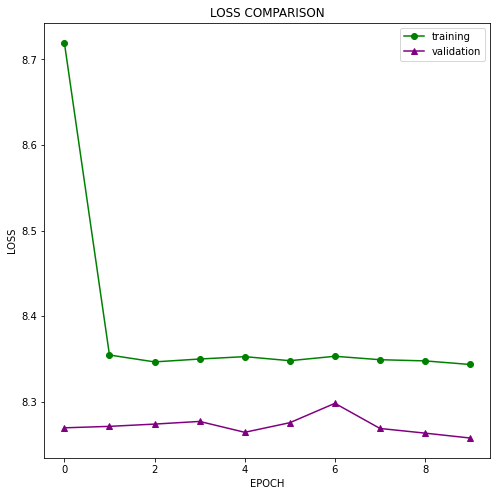

In [165]:
plt.figure(figsize=(8, 8))
plt.plot(list(range(10)), df['loss'], marker='o', color='green', label='training')
plt.plot(list(range(10)), df['val_loss'], marker='^', color='purple', label='validation')
plt.legend()
plt.title("LOSS COMPARISON")
plt.xlabel("EPOCH")
plt.ylabel("LOSS")
plt.savefig("loss.png")
plt.show()

In [170]:
preds = model.predict(train_premise)
f1 = 0
for i in range(20):
    f1 += f1_score(np.where(preds[i] < 0.5, 0, 1), train_output[i], average='macro')
f1 = f1 / 20
print(f1)

135/135 [==============================] - 40s 295ms/step
0.45131327447736364


In [172]:
test_Y

,Self-direction: thought,Self-direction: action,Stimulation,Hedonism,Achievement,Power: dominance,Power: resources,Face,Security: personal,Security: societal,Tradition,Conformity: rules,Conformity: interpersonal,Humility,Benevolence: caring,Benevolence: dependability,Universalism: concern,Universalism: nature,Universalism: tolerance,Universalism: objectivity
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
1892,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1
1893,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
1894,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1


In [174]:
test_Y.values[:, 0]

array([0, 0, 0, ..., 0, 0, 0])

In [175]:
test_premise = test_X['Input'].values
test_output = []
for i in range(20):
    test_output.append(test_Y.values[:, i])


In [177]:
preds = model.predict(test_premise)
f1 = 0
for i in range(20):
    f1 += f1_score(np.where(preds[i] < 0.5, 0, 1), test_output[i], average='macro')
f1 = f1 / 20
print(f1)

60/60 [==============================] - 17s 287ms/step
0.45204068267743674
